In [11]:

!pip install pandas numpy

import pandas as pd
import numpy as np


[notice] A new release of pip is available: 23.2.1 -> 25.2
[notice] To update, run: pip install --upgrade pip


In [3]:
df = pd.read_csv('placement.csv')

In [6]:
df.shape

(100, 4)

In [12]:
df = df.iloc[:, 1:]

In [13]:
df.head()

,cgpa,iq,placement
0,6.8,123.0,1
1,5.9,106.0,0
2,5.3,121.0,0
3,7.4,132.0,1
4,5.8,142.0,0


In [14]:
import matplotlib.pyplot as plt

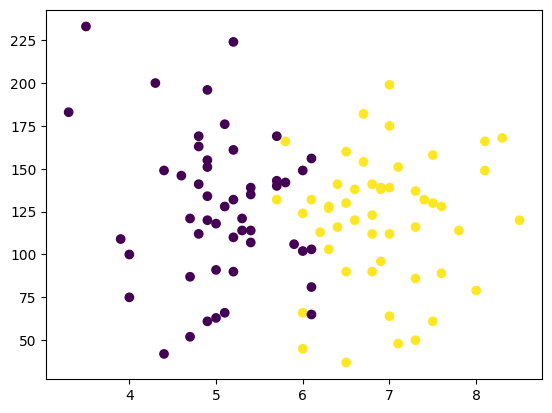

In [16]:
plt.scatter(df["cgpa"],df['iq'],c=df['placement'])

In [18]:
X = df.iloc[:,0:2]
y = df.iloc[:,-1]

In [19]:
X

,cgpa,iq
0,6.8,123.0
1,5.9,106.0
2,5.3,121.0
3,7.4,132.0
4,5.8,142.0
...,...,...
95,4.3,200.0
96,4.4,42.0
97,6.7,182.0
98,6.3,103.0


In [20]:
y

0     1
1     0
2     0
3     1
4     0
     ..
95    0
96    0
97    1
98    1
99    1
Name: placement, Length: 100, dtype: int64

In [22]:
from sklearn.model_selection import train_test_split
X_train,X_test,y_train,y_test=train_test_split(X,y,test_size=0.1)

In [23]:
from sklearn.preprocessing import StandardScaler
scaler=StandardScaler()

In [28]:
X_train=scaler.fit_transform(X_train)
X_test=scaler.fit_transform(X_test)

In [29]:
X_train

array([[-0.26966559,  0.43062275],
       [ 1.70280003, -1.08581015],
       [-1.72757496, -1.18524837],
       [ 0.15913128, -0.24058526],
       [ 0.07337191, -1.03609104],
       [ 0.33065003,  0.4554823 ],
       [ 0.84520628,  1.89733653],
       [-1.04149996,  1.15154986],
       [ 1.27400316,  0.18202719],
       [ 0.75944691,  0.40576319],
       [ 0.58792816,  0.77865653],
       [-0.78422184,  1.32556675],
       [-0.86998121, -0.78749548],
       [-1.04149996,  1.00239253],
       [-0.86998121, -0.11628748],
       [-0.61270309, -0.2157257 ],
       [-1.38453746, -2.00561371],
       [-0.69846246,  0.95267342],
       [-0.95574059,  0.70407786],
       [ 1.35976253, -0.83721459],
       [-1.21301871,  0.57978008],
       [-1.72757496, -0.56375948],
       [ 1.10248441, -1.80673726],
       [ 0.67368753, -0.81235503],
       [ 1.10248441,  0.35604408],
       [ 1.96007815,  1.1266903 ],
       [-0.01238747, -1.93103504],
       [ 0.24489066,  0.13230808],
       [ 0.75944691,

In [30]:
X_test

array([[ 0.39341619,  0.71365408],
       [-1.32777965, -0.31424274],
       [ 0.27047363, -0.2261373 ],
       [ 0.88518643, -0.04992642],
       [ 1.49989923, -0.57855907],
       [ 0.39341619, -1.95887766],
       [-1.81954989,  2.00586723],
       [-0.71306685, -0.63729603],
       [-0.46718173,  0.21438991],
       [ 0.88518643,  0.831128  ]])

In [31]:
from sklearn.linear_model import LogisticRegression
clf = LogisticRegression()

In [32]:
#model training 
clf.fit(X_train,y_train)

,penalty,'l2'
,dual,False
,tol,0.0001
,C,1.0
,fit_intercept,True
,intercept_scaling,1
,class_weight,None
,random_state,None
,solver,'lbfgs'
,max_iter,100
,multi_class,'deprecated'


In [36]:
y_pred = clf.predict(X_test)

In [35]:
y_test

8     0
24    0
27    1
57    1
29    1
56    0
95    0
92    0
12    0
38    1
Name: placement, dtype: int64

In [37]:
from sklearn.metrics import accuracy_score


In [38]:
accuracy_score(y_test,y_pred)

0.8

In [40]:
!pip install mlxtend
from mlxtend.plotting import plot_decision_regions

  Obtaining dependency information for mlxtend from https://files.pythonhosted.org/packages/4c/43/2fc7f76c8891aef148901f1ba3dee65c1cbac00a85ae5ee0dabc2b861256/mlxtend-0.23.4-py3-none-any.whl.metadata
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 1.4/1.4 MB 1.5 MB/s eta 0:00:0000:0100:01

[notice] A new release of pip is available: 23.2.1 -> 25.2
[notice] To update, run: pip install --upgrade pip


<Axes: >

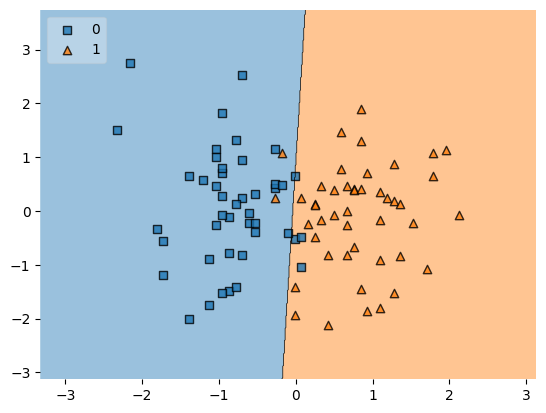

In [41]:
plot_decision_regions(X_train, y_train.values, clf=clf, legend=2)

In [42]:
import pickle

In [43]:
pickle.dump(clf, open('model.pkl','wb'))